W1= 1.8526264645686386 W2= 1.5525012788446158


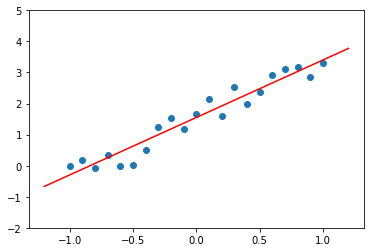

In [18]:
#Linear Regression 
#   Q1)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cd=["x","y"]
df = pd.read_csv('/content/drive/MyDrive/linear.txt',delim_whitespace=True,header=0,names=["x","y"]) 
X=np.array(df['x'])
Y=np.array(df['y'])
 
def L_function(X,Y,w1,w2):      #Given loss function
    L_w=0
    for i in range(len(X)):
        L_w+=((w1*X[i]+w2-Y[i])**2)
    return L_w
 
def func_der_w1(w1,w2):         #first derivative with respect to w1
    L_dw1=0
    for i in range(len(X)):
        L_dw1+=((2*w1*X[i]*X[i])+2*X[i]*w2-2*X[i]*Y[i])
    return L_dw1
 
def func_der_w2(w1,w2):         #First derivative with respect to w2
    L_dw2=0
    for i in range(len(X)):
        L_dw2+=((2*w2)+2*w1*X[i]-2*Y[i])
    return L_dw2
 
def  gradient(w1_initial,w2_initial,alpha):
    w1_t=(w1_initial)
    w2_t=(w2_initial)
    w1_next=w1_initial-(alpha * func_der_w1(w1_initial,w2_initial))
    w2_next=w2_initial-(alpha * func_der_w2(w1_initial,w2_initial))
    t=0
    while abs(w1_next-w1_t)>0.0001 and t!=1000000:
        w1_t=(w1_next)
        w1_next=w1_t-(alpha * func_der_w1(w1_t,w2_t))
        t+=1
        # print(w1_t)
    t=0
    while w2_next-w2_t>0.0001 and t!=1000000:
        w2_t=w2_next
        w2_next=w2_t-(alpha * func_der_w2(w1_t,w2_t))
        t+=1
        # print(w2_t)
    # print(t)
    w1_t=(w1_next)
    w2_t=(w2_next)
    return w1_t,w2_t
x_t,y_t=gradient(1,1,0.01)
print("W1=",x_t,"W2=",y_t)
plt.scatter(X,Y)
x=np.linspace(-1.2,1.2,1000)
plt.plot(x,x_t*x+y_t,'r')
plt.ylim(-2,5)
plt.show()

In [19]:
sq_error=0
for i in range(len(X)):
    sq_error+=((Y[i]-(x_t*X[i]+y_t))**2)
print(sq_error/len(X))

0.09296333443009364


W1= 5.747915144031904 W2= 5.775811102326765 W3= -5.5558232130849445


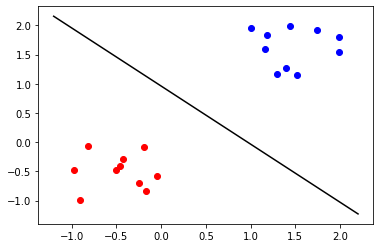

In [ ]:
#   Logistic regression
#   Q2)
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
colmap={1:'r',2:'orange',3:'b',4:'g',5:'y'}
df = pd.read_csv('/content/drive/MyDrive/logistic.txt',delim_whitespace=True,header=0,names=["x1","x2","y"]) 
X1=np.array(df['x1'])
X2=np.array(df['x2'])
Y=np.array(df['y'])
def sigmoid(w1,w2,w3,i):
    sigma=0
    sigma+=(1/(1+np.exp(-1*Y[i]*(w1*X1[i]+w2*X2[i]+w3))))
    return sigma
def Func_deri_w1(w1,w2,w3):
    der=0
    for i in range(len(Y)):
        der+=((1-sigmoid(w1,w2,w3,i))*Y[i]*X1[i])
    return der
 
def Func_deri_w2(w1,w2,w3):
    der=0
    for i in range(len(Y)):
        der+=((1-sigmoid(w1,w2,w3,i))*Y[i]*X2[i])
    return der
 
def Func_deri_w3(w1,w2,w3):
    der=0
    for i in range(len(Y)):
        der+=((1-sigmoid(w1,w2,w3,i))*Y[i])
    return der
 
def  gradient_logistic(w1_initial,w2_initial,w3_initial,alpha):
    w1_t=w1_initial+(alpha * Func_deri_w1(w1_initial,w2_initial,w3_initial))
    w2_t=w2_initial+(alpha * Func_deri_w2(w1_initial,w2_initial,w3_initial))
    w3_t=w3_initial+(alpha * Func_deri_w3(w1_initial,w2_initial,w3_initial))
    t=0
    while t!=1000000:
        w1_next=w1_t+(alpha * Func_deri_w1(w1_t,w2_t,w3_t))
        w2_next=w2_t+(alpha * Func_deri_w2(w1_t,w2_t,w3_t))
        w3_next=w3_t+(alpha * Func_deri_w3(w1_t,w2_t,w3_t))
        t+=1
        w1_t=w1_next
        w2_t=w2_next
        w3_t=w3_next
    # print(t)
    return w1_t,w2_t,w3_t
 
w1,w2,w3=gradient_logistic(1,1,1,0.001)
print("W1=",w1,"W2=",w2,"W3=",w3)
for i in range(len(Y)):
    plt.scatter(X1[i],X2[i],color=colmap[Y[i]+2])
x=np.linspace(-1.2,2.2,100)
plt.plot(x,-(w1*x+w3)/w2,color='black')   
plt.show()

In [23]:
#   Q3
#Using mnist train dataset
train_data=pd.read_csv("/content/drive/MyDrive/mnist_train.csv").to_numpy()
num=[]
for i in range(len(train_data)):
    if(train_data[i][0]==4):        
        train_data[i][0]=1
    elif train_data[i][0]==7:
        train_data[i][0]=-1
    else:
        num.append(i)
train_new=np.delete(train_data,num,0)
train_new

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0],
       [-1,  0,  0, ...,  0,  0,  0]])

In [40]:
#Lets take 4 as +1 class and 7 as -1 class
def sigmoid(z):
    return 1/(1+np.exp(-z))
def logistic_regression(d,T,alpha):
    w=np.zeros(len(d[0]))
    for j in range(T):
        p_deri=np.zeros(len(d[0]))
        for i in range(len(d[0])):
            X=np.append([1],d[i,1:])
            Y=d[i][0]
            p_der=(1-sigmoid(np.dot(w,X)*(Y)))*X*Y
            p_deri+=p_der
        w+=alpha*p_deri
    return w
w_star=logistic_regression(train_new,100,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
#Mnsit test data and testing on the above w_star, about how accurately does the logistic regression classifies
test_data=pd.read_csv("/content/drive/MyDrive/mnist_test.csv").to_numpy()
num=[]
sum=0
for i in range(len(test_data)):             
    if(test_data[i][0]==4):         #If its 4 then it should belong to +1 class
        test_data[i][0]=1
    elif test_data[i][0]==7:        #If its -1 then it should belong to -1 class
        test_data[i][0]=-1
    else:
        num.append(i)
test_new=np.delete(test_data,num,0) #For removing the data rows with label other than 4 and 7
for i in range(len(test_new)):         #For findiing the accuracy of the logistic regression
    X=np.append([1],test_new[i,1:])
    Y=test_new[i][0]
    if sigmoid(np.dot(w_star,X))>1/2:
        if(Y==1):
            sum+=1
    else:
        if(Y==-1):
            sum+=1
print("The Accuracy on test data is:",((sum)/(len(test_new)))*100,"%\n\n\n")

The Accuracy on test data is: 98.05970149253731 %





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
